## Imports

In [32]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('font', family='Georgia')

from tqdm import tqdm

# TODO: Delete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading and preparing data

### Algorithm 1: CMAES

In [33]:
N_RUNS = 10
NGEN = 100
POPULATION_SIZE = 100
ENEMIES = [1,3,4]

DATA_FOLDER = os.path.join('data', 'cmaes')
cmaes_data = []

for (i, enemy) in enumerate(ENEMIES):
    cmaes_data.append(np.load(DATA_FOLDER + f"/{enemy}/all_fitnesses_static.npy"))

cmaes_data = np.array(cmaes_data)
cmaes_data.shape

(3, 10, 100, 100)

In [34]:
# Number of repeated game runs with optimal weights
N_REPEATS = 5

# Number of optimization runs
N_RUNS = 10

# Load data
cmaes_gains = np.zeros((len(ENEMIES), N_REPEATS * N_RUNS))

for (i, enemy) in enumerate(ENEMIES):
    cmaes_gains[i] = np.load(os.path.join(DATA_FOLDER, f'{enemy}', 'gains.npy'))

### Algorithm 2: NEAT

#### Fitness data

In [35]:
N_RUNS = 10
NGEN = 100
POPULATION_SIZE = 100
ENEMIES = [1,3,4]

DATA_FOLDER = os.path.join('data', 'neat')
neat_data = []

for (i, enemy) in enumerate(ENEMIES):
    neat_data.append(np.load(DATA_FOLDER + f"/{enemy}/all_fitnesses_static.npy"))

neat_data = np.array(neat_data)
neat_data.shape

(3, 10, 100, 110)

#### Gains data

In [36]:
# Number of repeated game runs with optimal weights
N_REPEATS = 5

# Number of optimization runs
N_RUNS = 10

# Load data
neat_gains = np.zeros((len(ENEMIES), N_REPEATS * N_RUNS))

for (i, enemy) in enumerate(ENEMIES):
    neat_gains[i] = np.load(os.path.join(DATA_FOLDER, f'{enemy}', 'gains.npy'))

## Part 1: Fitness over time

In [37]:
# Max fitness among individuals
cmaes_max = np.max(cmaes_data, axis=3)
print(cmaes_max.shape)

# Hall-of-fame variant instead of generational max
cmaes_hof = np.zeros(cmaes_max.shape)

for i in range(len(ENEMIES)):
    for j in range(N_RUNS):
        for k in range(1, NGEN):
            cmaes_hof[i,j,k] = max(cmaes_max[i,j,k], cmaes_hof[i,j,k-1])

# Average & SD across runs
cmaes_avg_max = np.mean(cmaes_max, axis=1)
cmaes_sd_max = np.std(cmaes_max, axis=1)

cmaes_avg_hof = np.mean(cmaes_hof, axis=1)
cmaes_sd_hof = np.std(cmaes_hof, axis=1)

# Mean fitness among individuals
cmaes_mean = np.mean(cmaes_data, axis=3)
print(cmaes_mean.shape)

# Average & SD across runs
cmaes_avg_mean = np.mean(cmaes_mean, axis=1)
cmaes_sd_mean = np.std(cmaes_mean, axis=1)

(3, 10, 100)
(3, 10, 100)


In [38]:
# Max fitness among individuals
neat_max = np.nanmax(neat_data, axis=3)
print(neat_max.shape)

# Average & SD across runs
neat_avg_max = np.mean(neat_max, axis=1)
neat_sd_max = np.std(neat_max, axis=1)

# Mean fitness among individuals
neat_mean = np.nanmean(neat_data, axis=3)

# Average & SD across runs
neat_avg_mean = np.mean(neat_mean, axis=1)
neat_sd_mean = np.std(neat_mean, axis=1)

(3, 10, 100)


### Regular plot mean and SD

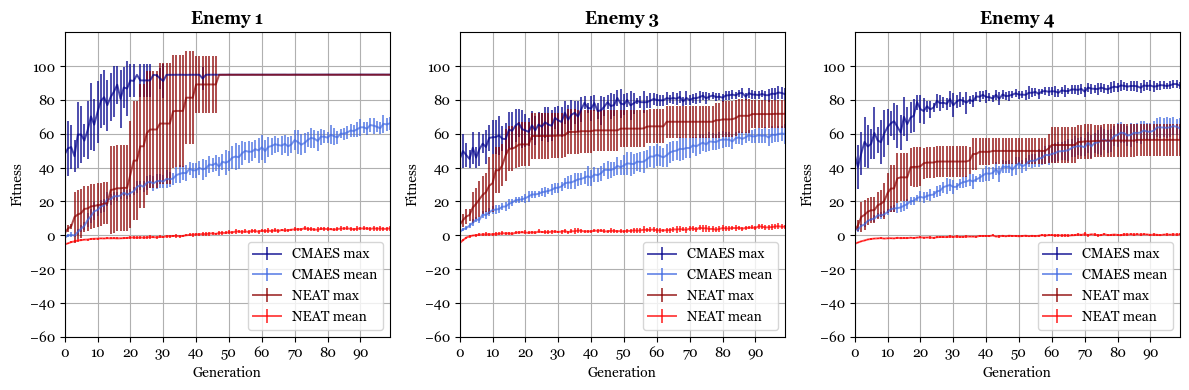

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
xx = np.arange(0, NGEN, 1, dtype=int)

def plot_mean_with_sd(ax, xx, means, sds, color="blue", fill_color="lightblue", linestyle="solid", label=""):
    ax.plot(means, color=color, linestyle=linestyle, lw=2.5, label=label)
    ax.plot(means + sds, color=color, linestyle=linestyle, lw=1.25)
    ax.plot(means - sds, color=color, linestyle=linestyle, lw=1.25)
    ax.fill_between(xx, means + sds, means - sds, color=fill_color)

# Plot setup
for (i, enemy) in enumerate(ENEMIES):
    # Y-axis
    axes[i].set_ylim(-60, 120)
    axes[i].set_yticks(np.arange(-60, 120, 20))
    axes[i].set_ylabel("Fitness")

    # X-axis
    axes[i].set_xlim(0, NGEN - 1)
    axes[i].set_xticks(np.arange(0, NGEN, 10))
    axes[i].set_xlabel("Generation")

    # Whole plot
    axes[i].set_title(f"Enemy {enemy}", weight="bold")
    axes[i].grid()

# Plotting data
for i in range(len(ENEMIES)):
    axes[i].errorbar(range(NGEN), cmaes_avg_max[i], yerr=cmaes_sd_max[i], alpha=0.7, lw=1.4, color="darkblue", label="CMAES max")
    axes[i].errorbar(range(NGEN), cmaes_avg_mean[i], yerr=cmaes_sd_mean[i], alpha=0.7, lw=1.4, color="royalblue", label="CMAES mean")

    axes[i].errorbar(range(NGEN), neat_avg_max[i], yerr=neat_sd_max[i], alpha=0.7, lw=1.4, color="darkred", label="NEAT max")
    axes[i].errorbar(range(NGEN), neat_avg_mean[i], yerr=neat_sd_mean[i], alpha=0.7, lw=1.4, color="red", label="NEAT mean")

    axes[i].legend(loc="lower right")

fig.tight_layout()
plt.show()

### Fitness plot: variant with Hall-of-Fame in CMAES

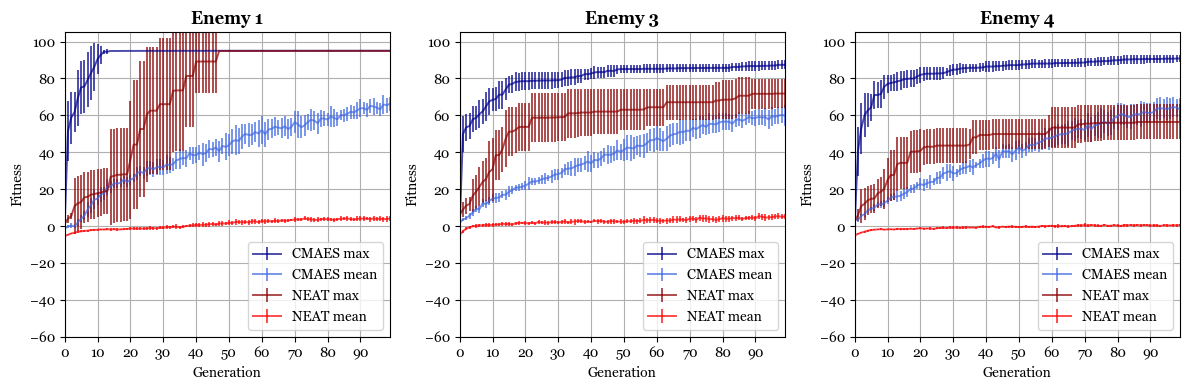

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
xx = np.arange(0, NGEN, 1, dtype=int)

def plot_mean_with_sd(ax, xx, means, sds, color="blue", fill_color="lightblue", linestyle="solid", label=""):
    ax.plot(means, color=color, linestyle=linestyle, lw=2.5, label=label)
    ax.plot(means + sds, color=color, linestyle=linestyle, lw=1.25)
    ax.plot(means - sds, color=color, linestyle=linestyle, lw=1.25)
    ax.fill_between(xx, means + sds, means - sds, color=fill_color)

# Plot setup
for (i, enemy) in enumerate(ENEMIES):
    # Y-axis
    axes[i].set_ylim(-60, 105)
    axes[i].set_yticks(np.arange(-60, 101, 20))
    axes[i].set_ylabel("Fitness")

    # X-axis
    axes[i].set_xlim(0, NGEN - 1)
    axes[i].set_xticks(np.arange(0, NGEN, 10))
    axes[i].set_xlabel("Generation")

    # Whole plot
    axes[i].set_title(f"Enemy {enemy}", weight="bold")
    axes[i].grid()

# Plotting data
for i in range(len(ENEMIES)):
    axes[i].errorbar(range(NGEN), cmaes_avg_hof[i], yerr=cmaes_sd_hof[i], alpha=0.7, lw=1.4, color="darkblue", label="CMAES HOF-max")
    axes[i].errorbar(range(NGEN), cmaes_avg_mean[i], yerr=cmaes_sd_mean[i], alpha=0.7, lw=1.4, color="royalblue", label="CMAES mean")

    axes[i].errorbar(range(NGEN), neat_avg_max[i], yerr=neat_sd_max[i], alpha=0.7, lw=1.4, color="darkred", label="NEAT max")
    axes[i].errorbar(range(NGEN), neat_avg_mean[i], yerr=neat_sd_mean[i], alpha=0.7, lw=1.4, color="red", label="NEAT mean")

    axes[i].legend(loc="lower right")

fig.tight_layout()
plt.show()

### Optional: all runs (CMAES MAX)

## Part 2: Boxplot

I'll do 50 runs instead of 5. Seems like it makes more sense.

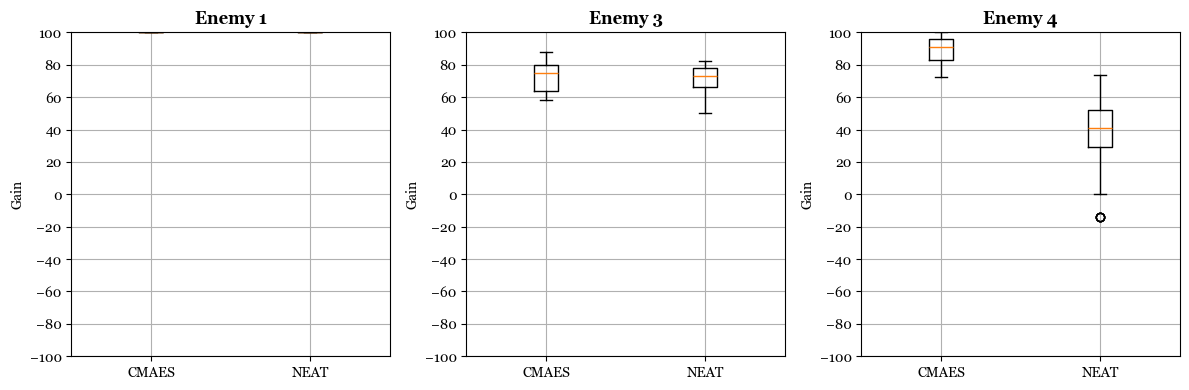

In [19]:
from scipy.stats import ttest_ind

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

def plot_mean_with_sd(ax, xx, means, sds, color="blue", fill_color="lightblue", linestyle="solid", label=""):
    ax.plot(means, color=color, linestyle=linestyle, lw=2.5, label=label)
    ax.plot(means + sds, color=color, linestyle=linestyle, lw=1.25)
    ax.plot(means - sds, color=color, linestyle=linestyle, lw=1.25)
    ax.fill_between(xx, means + sds, means - sds, color=fill_color)

# Plot setup
for (i, enemy) in enumerate(ENEMIES):
    # Y-axis
    axes[i].set_ylim(-100, 100)
    axes[i].set_yticks(np.arange(-100, 101, 20))
    axes[i].set_ylabel("Gain")

    # Whole plot
    axes[i].set_title(f"Enemy {enemy}", weight="bold")
    axes[i].grid()

# Plotting data
for i in range(len(ENEMIES)):
    axes[i].boxplot([cmaes_gains[i], neat_gains[i]])
    axes[i].set_xticklabels(['CMAES', 'NEAT'])

fig.tight_layout()
plt.show()

In [18]:
for i in range(len(ENEMIES)):
    print(ttest_ind(cmaes_gains[i], neat_gains[i]).pvalue)

nan
0.22111366660376872
1.2582601994224184e-25


d:\UvA\evolutionary_computing\evoman_ec\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
